## Using the model to do predictions

**NOTE: The code below, assumes that the model is already built and stored in variable <code>model</code>**

Let's use the model we built and stored in `model`, to do some predictions.

The second image in the testing dataset is used (`X_test[1]`), first, the image is shown using (`imshow()`), then predictions is made on the image. Recall that `X_test[1]` is list of 1D representations of the images, therefore, it needs to be converted back to a 2D of $28 \times 28$ pixles before passed in to `imshow()` for display.

Then, two prediction functions will be used:

1- `model.predict()`: takes in a numpy array of 1D representation of an image, and produces the posterior probabilites of all possible classes, in our example, we have 10 classes corresponding to letters *a* to *j*.

2- `model.predict_classes()`: takes in a numpy array of 1D representation of an image and process a class.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
data = loadmat('notMNIST_small.mat')
X_temp = data['images']/255

#for i in range(X_temp.shape[2]):
    
X = np.empty(shape=[X_temp.shape[2]] + [784], dtype='float32')
for i in range(X_temp.shape[2]):
    X[i,:] = X_temp[:,:,i].flatten()

y = pd.get_dummies(data['labels']).as_matrix()



print X_temp.shape
print X.shape
print y.shape
X[1,:]

(28L, 28L, 18724L)
(18724L, 784L)
(18724L, 10L)


C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


array([0.        , 0.00392157, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03137255, 0.16078432, 0.38039216, 0.6509804 , 0.87058824,
       0.9764706 , 0.90588236, 0.6627451 , 0.4       , 0.11764706,
       0.        , 0.00784314, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.07450981,
       0.3647059 , 0.44313726, 0.42745098, 0.4627451 , 0.5019608 ,
       0.54509807, 0.6392157 , 0.77254903, 0.8627451 , 0.9607843 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99607843, 1.        , 0.94509804, 0.42352942, 0.        ,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01176471, 0.654902  , 1.        , 0.9843137 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99607843, 0.98039216, 0.972549  ,
       0.99215686, 1.        , 0.99607843, 0.9882353 , 0.99215

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=50)
print X_train.shape
print y_train.shape

(14979L, 784L)
(14979L, 10L)


In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

stdscaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

# Stochastic Logistic Regression
model = Sequential()

# validation loss 
model.add(Dense(output_dim=10, input_shape=[784], 
                activation='sigmoid', W_regularizer=l2(0.01)))

sgd = SGD(lr=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_shape=[784], kernel_regularizer=<keras.reg..., units=10)`
  app.launch_new_instance()


In [6]:
# Fit the model
history = model.fit(X_train_scaled, y_train, batch_size = 256,
          nb_epoch = 100, verbose=0, validation_data=(X_test_scaled,y_test))

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Loss after final iteration:  0.503517628750591


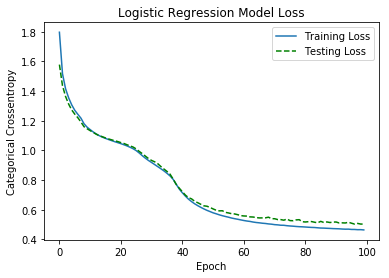

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Logistic Regression Model Loss')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()

posterior probabilities of each class: [[0.00111192 0.00469067 0.00185874 0.00356877 0.00159798 0.00078889
  0.09568869 0.00030918 0.00183253 0.00181323]]
predicted class (highest posterior): [6]


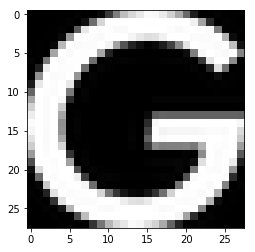

In [9]:
#Let's try to use the model to predict the class of the 2nd element
#in our testing data set (i.e., X_test[1])

#In order to show it as an image, we need to convert it back to 2D (28 x 28)
#array of pixles
image_as_1D = X_test[1]
image_as_2D = np.reshape(image_as_1D, (28, -1)) # 2nd dimension can be inferred

plt.imshow(image_as_2D, cmap="gray");

#Using predict() and predict_classes
#both functions, expect the 1D version of the image
predicted = model.predict(np.array([image_as_1D]))
predicted_class = model.predict_classes(np.array([image_as_1D]))
print("posterior probabilities of each class: {}".format(predicted))
print("predicted class (highest posterior): {}".format(predicted_class))


## Generating the confusion matrix

In order to create confusion matrix on the testing data set

1- obtain true classes for images in the testing data set: recall that y_test is one-hot encoding of true class, need to be converted back a class, function, ohe_to_classes(y), will be used to do that. The function simply takes a list of one-hot encoded classes, and returns a list of scalars, scalars represent the index of the 1 value in each one-hot encoded class of y.

2- use the model to predict classes of all images in the test data set (use .predict_classes)

3- use functions, classification_report, confusion matrix, f1_score and accuracy_score from sklearn.metrics module as needed.


In [10]:
import numpy as np
def ohe_to_classes(y):
    '''
        converts one hot encoding to classes
        y: a list of one-hot-encoded classes of data points
    '''
    return [np.argmax(v) for v in y]


In [11]:
# Let's try it

# an example of an array of one-hot-encoded classes, note that each row has exactly one value as 1.
# this example represents 2 data points
# Note that we have three classes in this example, class 0, 1, 2
ohe_example= [[0, 1, 0], [1, 0, 0]]

# the function converts the one-hot-encoding of the data sample class, to its class (0, 1, or 2)
true_classes = ohe_to_classes(np.array(ohe_example))

# true_classes is an 1D array of the sample data classes.
print("class of data point 1: {}".format(true_classes[0]))
print("class of data point 2: {}".format(true_classes[1]))
      

class of data point 1: 1
class of data point 2: 0


In [13]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

predicted_all = model.predict_classes(np.array(X_test))
print("predicted classes: {}".format(predicted_all))

# Have to convert one-hot-encoding to actual classes: 0 - 9
y_true_classes = ohe_to_classes(y_test)


print('accuracy', accuracy_score(predicted_all, y_true_classes))
confusion_mat = confusion_matrix(predicted_all, y_true_classes)
print("confusion matrix\n{}\n\n".format(confusion_mat))

print(classification_report(predicted_all, y_true_classes))


predicted classes: [5 6 3 ... 9 4 2]
('accuracy', 0.8405874499332443)
confusion matrix
[[301   0   0   1   0   0   0   7   3   0]
 [ 13 332   4   7   5   2   8  11   4   7]
 [  0   0 276   0   3   0   0   0   0   0]
 [  4  15   4 331   0   4   8   6  12  12]
 [ 10  11  56   4 326  46  18  33  21  13]
 [  1   0   0   0   0 297   1   1   1   1]
 [  5   1  13   1   7   2 336   8   9   7]
 [  9   0   0   2   0   0   0 312   2   0]
 [ 13  12   8  11  15  23  12  23 357  46]
 [  3   0   0   1   1   1   0   1   4 280]]


              precision    recall  f1-score   support

           0       0.84      0.96      0.90       312
           1       0.89      0.84      0.87       393
           2       0.76      0.99      0.86       279
           3       0.92      0.84      0.88       396
           4       0.91      0.61      0.73       538
           5       0.79      0.98      0.88       302
           6       0.88      0.86      0.87       389
           7       0.78      0.96      0.86    